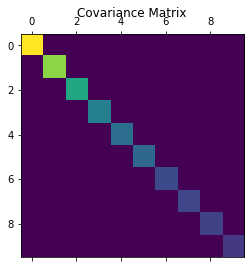

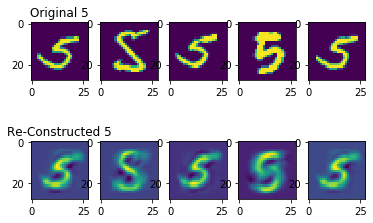

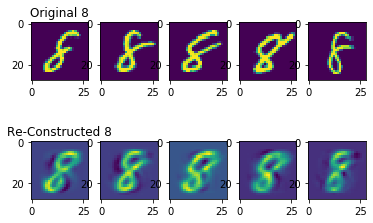

In [151]:
from load_mnist import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

trX, trY, tsX, tsY = mnist(noTrSamples=400,
                               noTsSamples=100, digit_range=[5, 8],
                               noTrPerClass=200, noTsPerClass=50)

pca1 = PCA(n_components=10)
pca2 = PCA(n_components=10)

trX = np.transpose(trX)
tsX = np.transpose(tsX)

pca1.fit(trX)
pca2.fit(tsX)

reducedTrX = pca1.transform(trX)
reducedTsX = pca2.transform(tsX)

cov_trX = np.matmul(np.transpose(reducedTrX), reducedTrX)
plt.matshow(cov_trX)
plt.title('Covariance Matrix')

trX_new = pca1.inverse_transform(reducedTrX)

f, axarr = plt.subplots(2,5)
axarr[0,0].imshow(trX[19,:].reshape(28, -1))
axarr[0,0].title.set_text('Original 5')
axarr[1,0].imshow(trX_new[19,:].reshape(28, -1))
axarr[1,0].title.set_text('Re-Constructed 5')
axarr[0,1].imshow(trX[18,:].reshape(28, -1))
axarr[1,1].imshow(trX_new[18,:].reshape(28, -1))
axarr[0,2].imshow(trX[17,:].reshape(28, -1))
axarr[1,2].imshow(trX_new[17,:].reshape(28, -1))
axarr[0,3].imshow(trX[16,:].reshape(28, -1))
axarr[1,3].imshow(trX_new[16,:].reshape(28, -1))
axarr[0,4].imshow(trX[15,:].reshape(28, -1))
axarr[1,4].imshow(trX_new[15,:].reshape(28, -1))

f1, axarr1 = plt.subplots(2,5)
axarr1[0,0].imshow(trX[239,:].reshape(28, -1))
axarr1[0,0].title.set_text('Original 8')
axarr1[1,0].imshow(trX_new[239,:].reshape(28, -1))
axarr1[1,0].title.set_text('Re-Constructed 8')
axarr1[0,1].imshow(trX[238,:].reshape(28, -1))
axarr1[1,1].imshow(trX_new[238,:].reshape(28, -1))
axarr1[0,2].imshow(trX[237,:].reshape(28, -1))
axarr1[1,2].imshow(trX_new[237,:].reshape(28, -1))
axarr1[0,3].imshow(trX[236,:].reshape(28, -1))
axarr1[1,3].imshow(trX_new[236,:].reshape(28, -1))
axarr1[0,4].imshow(trX[235,:].reshape(28, -1))
axarr1[1,4].imshow(trX_new[235,:].reshape(28, -1))


# LDA Implementation

LDA threshold........ 0.0
Test Classification Accuracy:  0.87
Train Classification Accuracy:  0.855


/home/nik/anaconda3/envs/FSL/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


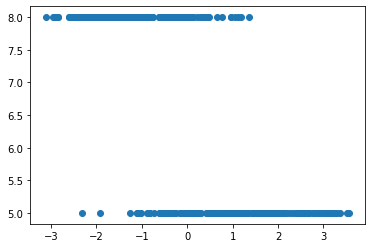

In [152]:
def in_class_covar(mean, data):
    sum = 0
    for i in data:
        i = i.reshape(-1,1)
        __mean_diff = (i - mean)
        __covar = np.multiply(__mean_diff, np.transpose(__mean_diff))
        sum += __covar
    return sum/data.shape[0]

cat5_Tr = reducedTrX[:200,:]
cat8_Tr = reducedTrX[200:,:]

cat5_mean = np.mean(cat5_Tr, axis=0).reshape(-1,1)
cat8_mean = np.mean(cat8_Tr, axis=0).reshape(-1,1)

cat_mean_diff = cat8_mean - cat5_mean
between_class_covar = np.multiply(cat_mean_diff, np.transpose(cat_mean_diff))

within_class_covar_cat5 = in_class_covar(cat5_mean, cat5_Tr)
within_class_covar_cat8 = in_class_covar(cat8_mean, cat8_Tr)

within_covar = within_class_covar_cat5 + within_class_covar_cat8
inv_within_covar = np.linalg.inv(within_covar)

w,v = np.linalg.eig(np.matmul(inv_within_covar, between_class_covar))
# eigen vector corresponding to max eigen val
max_eig = v[np.argmax(w)].reshape(-1,1)

# project all values now onto this eigen vector
lda_projected_cat5_tr = np.dot(cat5, max_eig)
lda_projected_cat8_tr = np.dot(cat8, max_eig)

lda_projected_ts =  np.dot(reducedTsX, max_eig)
lda_projected_tr =  np.dot(reducedTrX, max_eig)

pro_cat5_mean = np.mean(projected_cat5)
pro_cat8_mean = np.mean(projected_cat8)

print('LDA threshold........', np.around(np.real((pro_cat5_mean + pro_cat8_mean)/2)))

### Test classification

correct = 0
tsY = np.transpose(tsY)

for i in range(lda_projected_ts.shape[0]):
    if lda_projected_ts[i] <= 0.0:
        label = '8'
    else:
        label = '5'
    if int(label) == int(tsY[i][0]):
        correct+=1
    
print('Test Classification Accuracy: ', correct/tsY.shape[0])

### Train classification

correct = 0
trY = np.transpose(trY)

for i in range(lda_projected_tr.shape[0]):
    if lda_projected_tr[i] <= 0.0:
        label = '8'
    else:
        label = '5'
    if int(label) == int(trY[i][0]):
        correct+=1
    
print('Train Classification Accuracy: ', correct/trY.shape[0])
        
#-- plotting both classes.. not really needed
    
pro_cat5_var = np.var(projected_cat5)
pro_cat8_var = np.var(projected_cat8)

projected_data = np.append(projected_cat5,projected_cat8, axis=0)

fig, ax = plt.subplots()
ax.scatter(projected_data, trY)
plt.show()



# LDA check

(400, 10)


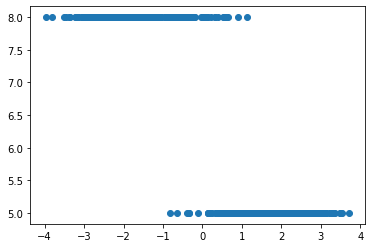

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='eigen')
print(reducedTrX.shape)
# print(trY.reshape(-1).shape)
clf.fit(reducedTrX, trY.reshape(-1))
projected_data = clf.transform(reducedTrX)

fig, ax = plt.subplots()
ax.scatter(projected_data, trY)
plt.show()

# HMM implementation

In [163]:
# FIRST --> generate 10 sequences of observations from 1st HMM

hidden_states = ['1', '2', '3', '4']
observation_states = ['S', 'A', 'B', 'C', 'D']

prior_prob = np.array([0.0, 1.0, 0.0, 0.0])
transition_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.4, 0.3, 0.3], [0.3, 0.2, 0.2, 0.3]])
emission_matrix = np.array([[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.5, 0.5, 0.0, 0.0], [0.0, 0.2, 0.2, 0.3, 0.3], [0.0, 0.0, 0.0, 0.5, 0.5]])

for i in range(10):
    _seq = []
    obs = ''
    hid = ''
    initial = True
    while obs != 'S':
        if initial:
            hid = np.random.choice(hidden_states, p=prior_prob)
            obs = np.random.choice(observation_states, p=emission_matrix[hidden_states.index(hid)])
            _seq.append(obs)
            initial = False
        hid = np.random.choice(hidden_states, p=transition_matrix[hidden_states.index(hid)])
        obs = np.random.choice(observation_states, p=emission_matrix[hidden_states.index(hid)])
        _seq.append(obs)
    print(i+1, ': ', ','.join(_seq))

1 :  A,D,S
2 :  A,C,D,S
3 :  B,D,C,S
4 :  B,D,D,C,A,C,C,D,A,A,D,C,C,S
5 :  B,D,C,A,C,S
6 :  A,D,B,C,C,B,C,C,S
7 :  A,C,S
8 :  A,C,B,B,C,S
9 :  B,D,S
10 :  A,C,C,D,B,A,D,B,C,C,S


In [61]:
# TRIAL --> generate 10 sequences of observations from 2nd HMM

hidden_states = ['1', '2', '3', '4']
observation_states = ['S', 'A', 'B', 'C', 'D']

prior_prob = np.array([0.0, 0.0, 0.0, 1.0])
transition_matrix = np.array([[1.0, 0.0, 0.0, 0.0], [0.1, 0.3, 0.5, 0.1], [0.1, 0.4, 0.3, 0.2], [0.1, 0.4, 0.2, 0.3]])
emission_matrix = np.array([[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.5, 0.0, 0.5], [0.0, 0.0, 0.5, 0.5, 0.0], [0.0, 0.5, 0.0, 0.0, 0.5]])

for i in range(10):
    _seq = []
    obs = ''
    hid = ''
    initial = True
    while obs != 'S':
        if initial:
            hid = np.random.choice(hidden_states, p=prior_prob)
            obs = np.random.choice(observation_states, p=emission_matrix[hidden_states.index(hid)])
            _seq.append(obs)
            initial = False
        hid = np.random.choice(hidden_states, p=transition_matrix[hidden_states.index(hid)])
        obs = np.random.choice(observation_states, p=emission_matrix[hidden_states.index(hid)])
        _seq.append(obs)
    print(i+1, ': ', ','.join(_seq))

1 :  D,A,B,C,D,S
2 :  A,B,B,A,A,A,C,C,C,B,A,B,D,S
3 :  D,D,D,D,B,D,B,D,D,B,D,B,B,D,A,S
4 :  D,D,C,B,D,C,D,A,D,D,D,D,C,A,B,D,S
5 :  D,B,B,D,B,S
6 :  A,S
7 :  A,B,C,C,B,D,D,A,D,B,B,B,C,S
8 :  A,B,S
9 :  A,B,C,C,B,B,B,S
10 :  D,B,C,B,C,S


In [55]:
hidden_states = ['1', '2', '3', '4']
observation_states = ['S', 'A', 'B', 'C', 'D']

prior_prob1 = np.array([0.0, 1.0, 0.0, 0.0])
transition_matrix1 = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.4, 0.3, 0.3], [0.3, 0.2, 0.2, 0.3]])
emission_matrix1 = np.array([[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.5, 0.5, 0.0, 0.0], [0.0, 0.2, 0.2, 0.3, 0.3], [0.0, 0.0, 0.0, 0.5, 0.5]])

prior_prob2 = np.array([0.0, 0.0, 0.0, 1.0])
transition_matrix2 = np.array([[1.0, 0.0, 0.0, 0.0], [0.1, 0.3, 0.5, 0.1], [0.1, 0.4, 0.3, 0.2], [0.1, 0.4, 0.2, 0.3]])
emission_matrix2 = np.array([[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.5, 0.0, 0.5], [0.0, 0.0, 0.5, 0.5, 0.0], [0.0, 0.5, 0.0, 0.0, 0.5]])



In [142]:
### Forward Algorithm

def classify_given_obs(obs):
    obs = obs.split(',')
    cat_1 = get_forward_alg(obs, '1')
    cat_2 = get_forward_alg(obs, '2')
#     print(cat_1, cat_2)
    if cat_1 == cat_2:
        return 0
    return 1 if cat_1 > cat_2 else 2
    
def get_forward_alg(obs, hmm_set):
    if hmm_set == '1':
        prior_prob = prior_prob1
        transition_matrix = transition_matrix1
        emission_matrix = emission_matrix1
    else:
        prior_prob = prior_prob2
        transition_matrix = transition_matrix2
        emission_matrix = emission_matrix2
        
    forward_matrix = np.ones(len(hidden_states)*len(obs)).reshape(len(hidden_states),-1)

    for i in range(len(obs)):
        if i == 0:
            forward_matrix[:,i] = prior_prob * emission_matrix[:,observation_states.index(obs[i])]
            continue
        for j in range(len(hidden_states)):
            forward_matrix[j][i] = sum(forward_matrix[:,i-1] * transition_matrix[:,j]) * emission_matrix[j][observation_states.index(obs[i])]
#     print('-----hmm_set: ', hmm_set, ' -----')
#     print(forward_matrix)
    return sum(forward_matrix[:,-1])
    
print(classify_given_obs('A,D,C,B,D,C,C,S'))
print(classify_given_obs('B,D,S'))
print(classify_given_obs('B,C,C,B,D,D,C,A,C,S'))
print(classify_given_obs('A,C,D,S'))
print(classify_given_obs('A,D,A,C,S'))
print(classify_given_obs('D,B,B,S'))
print(classify_given_obs('A,B,S'))
print(classify_given_obs('D,D,B,D,D,B,A,C,C,D,A,B,B,C,D,B,B,B,S'))
print(classify_given_obs('D,B,D,S'))
print(classify_given_obs('A,A,A,A,D,C,B,S'))


1
1
1
1
1
2
2
2
2
2


In [145]:
### Viterbi Algorithm

def get_viterbi_alg(obs):
    obs = obs.split(',')
    
    prior_prob = prior_prob2
    transition_matrix = transition_matrix2
    emission_matrix = emission_matrix2

    viterbi_matrix = np.ones(len(hidden_states)*len(obs)).reshape(len(hidden_states),-1)
    pointer_matrix = np.ones(len(hidden_states)*len(obs)).reshape(len(hidden_states),-1)

    for i in range(len(obs)):
        if i == 0:
            viterbi_matrix[:,i] = prior_prob * emission_matrix[:,observation_states.index(obs[i])]
            pointer_matrix[:,i] = np.zeros(pointer_matrix[:,1].shape)
            continue
        for j in range(len(hidden_states)):
            viterbi_matrix[j][i] = max(viterbi_matrix[:,i-1] * transition_matrix[:,j]) * emission_matrix[j][observation_states.index(obs[i])]
            pointer_matrix[j][i] = np.argmax((viterbi_matrix[:,i-1] * transition_matrix[:,j]) * emission_matrix[j][observation_states.index(obs[i])])
#     print(viterbi_matrix)
#     print(pointer_matrix)
    best_path_prob = max(viterbi_matrix[:,-1])
    best_path_pointer = np.argmax(viterbi_matrix[:,-1])
#     print(best_path_prob, best_path_pointer)
#     print('--yo----')
    hidden_states_seq = []
    hidden_states_seq.append(hidden_states[best_path_pointer])
    for i in range(len(obs)-1,0, -1):
        best_path_pointer = int(pointer_matrix[best_path_pointer,i])
        hidden_states_seq.append(hidden_states[best_path_pointer])
#     print(hidden_states_seq[::-1])
#     print(emission_matrix)
    return hidden_states_seq[::-1]

print(get_viterbi_alg('A,D,C,B,D,C,C,S'))
print(get_viterbi_alg('B,D,S'))
print(get_viterbi_alg('B,C,C,B,D,D,C,A,C,S'))
print(get_viterbi_alg('A,C,D,S'))
print(get_viterbi_alg('A,D,A,C,S'))
print(get_viterbi_alg('D,B,B,S'))
print(get_viterbi_alg('A,B,S'))
print(get_viterbi_alg('D,D,B,D,D,B,A,C,C,D,A,B,B,C,D,B,B,B,S'))
print(get_viterbi_alg('D,B,D,S'))
print(get_viterbi_alg('A,A,A,A,D,C,B,S'))


# print(get_viterbi_alg('D,A,B,C,D,S'))

['4', '2', '3', '2', '2', '3', '3', '1']
['1', '1', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
['4', '3', '2', '1']
['4', '4', '4', '3', '1']
['4', '2', '3', '1']
['4', '2', '1']
['4', '2', '3', '2', '2', '3', '4', '3', '3', '4', '4', '2', '2', '3', '2', '3', '2', '3', '1']
['4', '2', '2', '1']
['4', '4', '4', '4', '2', '3', '2', '1']


# Gaussian Processes

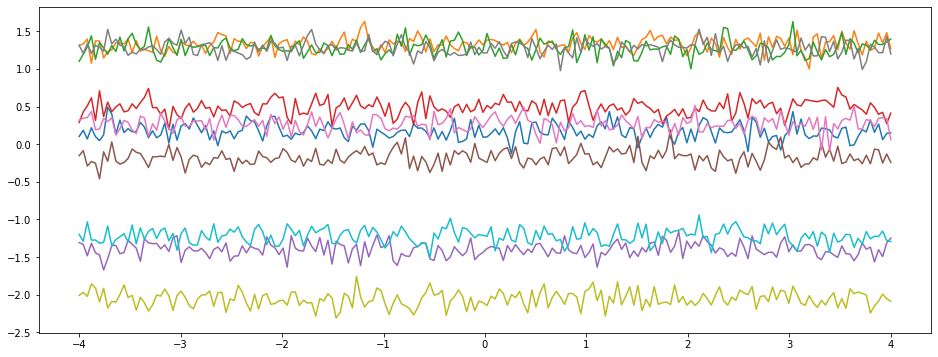

In [183]:
im[pp]

def kernel(x,y):
    # RBF
    sq_dist = np.sum(x**2) + np.sum(y**2) - 2*np.dot(x,np.transpose(y))
    return np.exp(-0.5*sq_dist)

n = 200
# Domain of f* we want to infer
x_s = np.linspace(0, 10, n)

# covariance matrix
K_ss = kernel(x_s, x_s, l=0.8)

# Is square root of matrix (standard deviation)
L_ss = np.linalg.cholesky(K_ss + 1e-6 * np.eye(n))

# N~(0, I) * L
f_prior = np.dot(L_ss, np.random.normal(size=(n, 15)))

plt.figure(figsize=(16, 6))
plt.plot(x_s, f_prior)

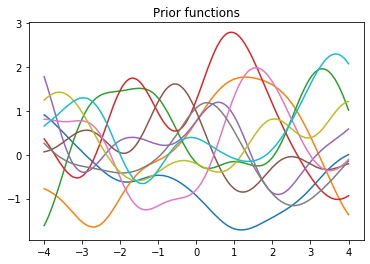

In [202]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(0.5*x).flatten()

def kernel(x,y):
    # RBF
    sq_dist = np.sum(x**2z) + np.sum(y**2) - 2*np.dot(x,y.T)
    return np.exp(-0.5*sq_dist)

n = 80
N = 5

s = 0.0001 # noise

D = [(-3.8, -0.9463), (-3.2, -0.9996), (-3, -0.9975), (1, 0.4794), (3, 0.9975)]

X = [d[0] for d in D]
Y = [d[1] for d in D]

Xtrain = np.array(X).reshape(5,1)
Ytrain = f(Xtrain) + s*np.random.randn(N)

Xtest = np.linspace(-4,4,n).reshape(-1,1)
Ytest = f(Xtest)

# draw samples from prior at test points

Kss = kernel(Xtest, Xtest)

L = np.linalg.cholesky(Kss + s * np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))

plt.title('Prior functions')
plt.plot(Xtest, f_prior)



In [206]:


D = [(-3.8, -0.9463), (-3.2, -0.9996), (-3, -0.9975), (1, 0.4794), (3, 0.9975)]

X = [d[0] for d in D]
Y = [d[1] for d in D]

f = lambda x: np.sin(0.5*x)

Xtrain = np.array(X).reshape(5,1)
Ytrain = f(Xtrain) + 1e-6*np.random.randn(N)

# non linear regression
Xtrain = np.array(X).reshape(5,1)
Ytrain = f(Xtrain) + 1e-6*np.random.randn(N)


s = 0.0001 # noise

# covar between training points
K = kernel(Xtrain, Xtrain)
L = np.linalg.cholesky(K + s* np.eye(N))

# compute mean and varuance of test points
# use linalg to solve linear eqn for k_star

Lk = np.linalg.solve(L, kernel(Xtrain, X))
mu = np.dot(Lk.T, np.linalg.solve(L, Ytrain))

# taking only diag values from covar matrix for getting std dev
s2 = np.diag(Kss) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

#plots for regression
#plot for mean points on top of test distribution

#plot train dist
plt.plot(Xtrain, Ytrain, 'y+',ms=20)

# plot test
plt.plot(Xtest, Ytest, 'b-')

#plot confidence interrval of dist
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color='#dddddd')

#plot mean pts on test dist
plt.plot(Xtest,mu,'r--',lw=2)
plt.title('Meaan predictions plus 2 st.deviations')



TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

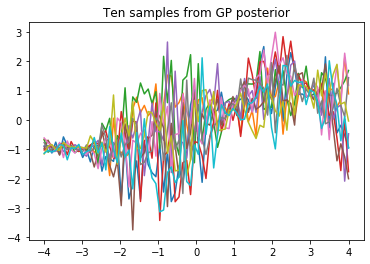

In [188]:
# plot posterior dist func

# use Gp rergression alg that uses var to plot posterior func derived using gaussian conditionals approach

L = np.linalg.cholesky(Kss + s*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) +  np.dot(L, np.random.normal(size = (n,10)))

plt.title('Ten samples from GP posterior')
plt.plot(Xtest,f_post)
